In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
#import model_probabilities data
model_prob=pd.read_csv('/users/veronicaventure/Desktop/model_probabilities.csv')
model_prob.head()

,uid,local_schools__good,local_schools__fair,local_schools__poor,vote__candidateA,vote__other,vote__candidateB,ideology__conservative,ideology__liberal,ideology__moderate,ideology__progressive,issueA__no_concerns,issueA__serious_concerns,issueA__some_concerns,issueB__no_concerns,issueB__serious_concerns,issueB__some_concerns,turnout,persuadability__score,job_performance__candidateB
0,19101063480,0.177226,0.309224,0.513550,0.286004,0.254312,0.459684,0.571222,0.149370,0.160582,0.118826,0.269443,0.508679,0.221877,0.228690,0.553770,0.217540,0.781051,0.808091,0.302316
1,19101122779,0.318363,0.497278,0.184359,0.250517,0.097125,0.652358,0.068001,0.324818,0.306552,0.300629,0.288238,0.411582,0.300180,0.305508,0.409580,0.284912,0.321001,0.481455,0.528614
2,19101930697,0.259784,0.513264,0.226952,0.250072,0.137827,0.612101,0.053519,0.297271,0.279585,0.369624,0.284489,0.389624,0.325887,0.297812,0.400432,0.301756,0.927072,0.417750,0.560018
3,19102226061,0.326893,0.510956,0.162151,0.357379,0.114221,0.528400,0.102977,0.308384,0.355358,0.233281,0.227971,0.527887,0.244143,0.231301,0.473917,0.294783,0.033656,0.556736,0.422886
4,19104235280,0.264571,0.413334,0.322095,0.302891,0.164756,0.532354,0.089655,0.309998,0.382134,0.218212,0.246472,0.454156,0.299372,0.269435,0.434299,0.296266,0.186029,0.583980,0.370679


In [3]:
#determine number of rows
model_prob.shape


(452223, 20)

In [4]:
#import opponents data
opp_id= pd.read_csv('/users/veronicaventure/Desktop/opponents_updated.csv')
opp_id.head()

,uid
0,19526650349
1,19527138642
2,19527003527
3,19527917297
4,19118511593


In [5]:
#determine number of rows
opp_id.shape

(11022, 1)

In [6]:
#import supporters data
supp_id= pd.read_csv('/users/veronicaventure/Desktop/supporters_updated.csv')
supp_id.head()

,uid
0,19525324660
1,19526595695
2,19525770478
3,19258610714
4,19244275530


In [7]:
#determine number of rows
supp_id.shape

(52567, 1)

In [8]:
#import uid to household key 
house_key= pd.read_csv('/users/veronicaventure/Desktop/uid_to_household_key.csv')
house_key.head()

,uid,household_key
0,19205437418,19-192265379
1,19418806098,19-192265368
2,19526898264,19-192265470
3,19523377311,19-192265425
4,19522932867,19-192265429


In [9]:
#determine number of rows
house_key.shape

(452223, 2)

In [10]:
#import voter_file
voter_file=pd.read_csv('/users/veronicaventure/Desktop/voter_file.csv')
voter_file.head()

,uid,age,avghomevalue,avgincome,edu_cg,edu_gd,edu_hsg,edu_nhsg,edu_sc,voted_statewide_primary_2012,...,voted_statewide_general_2014,voted_municipal_primary_2015,voted_municipal_general_2015,voted_statewide_primary_2016,home,ismarried,neighborhood,party,sex,whitecollarp
0,19522840044,61.0,656249,160770,40,12,22,10,26,N,...,A,N,N,A,H,Y,16,D,F,84
1,19251264405,57.0,656249,160770,40,12,22,10,26,A,...,N,N,N,A,NaN,N,16,D,F,84
2,19269989178,64.0,656249,160770,40,12,22,10,26,A,...,A,A,N,A,H,N,16,D,M,84
3,19526179466,91.0,656249,160770,40,12,22,10,26,A,...,A,A,N,A,H,N,16,D,M,84
4,19140377533,50.0,656249,160770,40,12,22,10,26,A,...,A,A,N,A,H,N,16,D,M,84


In [11]:
#determine number of rows
voter_file.shape

(434624, 24)

In [12]:
# create df with only data for opponents
opp_data=pd.merge(opp_id, model_prob, how='left', on ='uid')

In [13]:
opp_data.head()

,uid,local_schools__good,local_schools__fair,local_schools__poor,vote__candidateA,vote__other,vote__candidateB,ideology__conservative,ideology__liberal,ideology__moderate,ideology__progressive,issueA__no_concerns,issueA__serious_concerns,issueA__some_concerns,issueB__no_concerns,issueB__serious_concerns,issueB__some_concerns,turnout,persuadability__score,job_performance__candidateB
0,19526650349,0.328863,0.516807,0.154330,0.278613,0.130097,0.591290,0.041246,0.341853,0.262085,0.354816,0.234374,0.470037,0.295589,0.260771,0.487719,0.251510,0.097591,0.600696,0.408611
1,19527138642,0.301818,0.503737,0.194445,0.340839,0.130503,0.528658,0.027601,0.301541,0.336849,0.334009,0.221201,0.443211,0.335588,0.260002,0.409926,0.330072,0.018762,0.605922,0.417872
2,19527003527,0.345451,0.484596,0.169953,0.366981,0.121758,0.511261,0.031783,0.398459,0.275526,0.294231,0.224087,0.479476,0.296437,0.238345,0.454312,0.307343,0.050532,0.585860,0.430414
3,19527917297,0.334193,0.487892,0.177916,0.326698,0.120834,0.552468,0.108057,0.292099,0.311392,0.288452,0.265093,0.435682,0.299226,0.268838,0.409842,0.321320,0.034948,0.527261,0.434118
4,19118511593,0.309359,0.486670,0.203971,0.290896,0.119394,0.589710,0.035969,0.446434,0.225270,0.292327,0.283492,0.398302,0.318206,0.296033,0.396468,0.307499,0.734575,0.456775,0.484642


In [14]:
#determine number of rows
opp_data.shape

(11022, 20)

In [15]:
# create df with only data for supporters
supp_data=pd.merge(supp_id, model_prob, how='left', on ='uid')

In [16]:
supp_data.head()

,uid,local_schools__good,local_schools__fair,local_schools__poor,vote__candidateA,vote__other,vote__candidateB,ideology__conservative,ideology__liberal,ideology__moderate,ideology__progressive,issueA__no_concerns,issueA__serious_concerns,issueA__some_concerns,issueB__no_concerns,issueB__serious_concerns,issueB__some_concerns,turnout,persuadability__score,job_performance__candidateB
0,19525324660,0.259819,0.416067,0.324114,0.253360,0.124401,0.622239,0.120710,0.282388,0.319870,0.277032,0.259167,0.428924,0.311910,0.271954,0.436709,0.291338,0.136505,0.445737,0.470693
1,19526595695,0.241957,0.403503,0.354540,0.306002,0.118378,0.575620,0.265283,0.212200,0.322989,0.199528,0.198474,0.522235,0.279291,0.229553,0.490854,0.279593,0.054929,0.557648,0.395977
2,19525770478,0.245133,0.332107,0.422760,0.282013,0.120545,0.597441,0.079001,0.266940,0.355451,0.298608,0.208507,0.473900,0.317593,0.244104,0.432498,0.323398,0.041907,0.522463,0.354995
3,19258610714,0.285212,0.423757,0.291031,0.292195,0.098578,0.609227,0.244249,0.290337,0.275463,0.189952,0.277035,0.449000,0.273966,0.273375,0.454492,0.272134,0.738680,0.452018,0.550015
4,19244275530,0.285006,0.401092,0.313902,0.277886,0.148125,0.573989,0.286111,0.245287,0.281976,0.186626,0.282773,0.414708,0.302519,0.282114,0.425620,0.292266,0.565494,0.548733,0.448780


In [17]:
supp_data.shape

(52567, 20)

In [18]:
# opp data summary statistics
opp_data.describe()

,uid,local_schools__good,local_schools__fair,local_schools__poor,vote__candidateA,vote__other,vote__candidateB,ideology__conservative,ideology__liberal,ideology__moderate,ideology__progressive,issueA__no_concerns,issueA__serious_concerns,issueA__some_concerns,issueB__no_concerns,issueB__serious_concerns,issueB__some_concerns,turnout,persuadability__score,job_performance__candidateB
count,1.102200e+04,11022.000000,11022.000000,11022.000000,11022.000000,11022.000000,11022.000000,11022.000000,11022.000000,11022.000000,11022.000000,11022.000000,11022.000000,11022.000000,11022.000000,11022.000000,11022.000000,11022.000000,11022.000000,11022.000000
mean,1.841787e+10,0.335111,0.481535,0.183353,0.294748,0.125163,0.580089,0.058925,0.347004,0.266857,0.327213,0.243376,0.452633,0.303992,0.257273,0.435660,0.307067,0.216790,0.499271,0.465112
std,4.152707e+09,0.029588,0.041305,0.045473,0.041635,0.018780,0.044421,0.044989,0.066599,0.056309,0.074153,0.031402,0.040161,0.036168,0.029712,0.036636,0.030250,0.265390,0.067632,0.058262
min,1.926068e+07,0.300003,0.193242,0.081713,0.158585,0.078941,0.408917,0.021142,0.134860,0.121901,0.112499,0.112542,0.244629,0.198178,0.156232,0.280432,0.208195,0.006489,0.253729,0.257790
25%,1.935138e+10,0.311498,0.465298,0.150519,0.268569,0.113265,0.550997,0.033488,0.300327,0.225387,0.274135,0.220195,0.427846,0.284226,0.235821,0.410696,0.289173,0.033188,0.457379,0.423132
50%,1.952441e+10,0.328913,0.488510,0.178422,0.291988,0.122378,0.581818,0.044317,0.342409,0.259718,0.320088,0.240438,0.454063,0.300512,0.256192,0.437542,0.305583,0.090162,0.503139,0.453639
75%,1.952660e+10,0.352268,0.507164,0.207965,0.320737,0.133389,0.607349,0.065979,0.387383,0.300367,0.373733,0.265532,0.478332,0.317949,0.277170,0.458252,0.320987,0.284702,0.543044,0.497764
max,1.952793e+10,0.578762,0.601072,0.443986,0.454463,0.230945,0.738867,0.624168,0.667748,0.640468,0.668782,0.386451,0.613100,0.601024,0.362160,0.612035,0.512346,0.976513,0.809185,0.668732


In [19]:
#supp data summary statistics
supp_data.describe()

,uid,local_schools__good,local_schools__fair,local_schools__poor,vote__candidateA,vote__other,vote__candidateB,ideology__conservative,ideology__liberal,ideology__moderate,ideology__progressive,issueA__no_concerns,issueA__serious_concerns,issueA__some_concerns,issueB__no_concerns,issueB__serious_concerns,issueB__some_concerns,turnout,persuadability__score,job_performance__candidateB
count,5.256700e+04,52567.000000,52567.000000,52567.000000,52567.000000,52567.000000,52567.000000,52567.000000,52567.000000,52567.000000,52567.000000,52567.000000,52567.000000,52567.000000,52567.000000,52567.000000,52567.000000,52567.000000,52567.000000,52567.000000
mean,1.818847e+10,0.249869,0.387476,0.362656,0.294120,0.152672,0.553208,0.212541,0.257017,0.297302,0.233140,0.238392,0.477311,0.284296,0.247700,0.475362,0.276938,0.238685,0.583070,0.402866
std,4.526592e+09,0.036553,0.053116,0.074277,0.040332,0.036410,0.050958,0.165746,0.069693,0.070352,0.079878,0.027742,0.045071,0.041052,0.025712,0.048448,0.041642,0.273910,0.113627,0.061185
min,1.910060e+05,0.153159,0.185778,0.270001,0.170093,0.082018,0.349415,0.022464,0.107956,0.107719,0.094300,0.120354,0.269655,0.155270,0.146403,0.280432,0.165911,0.003077,0.286395,0.183491
25%,1.927500e+10,0.223511,0.352808,0.296085,0.266620,0.126872,0.520187,0.074938,0.209349,0.251524,0.172918,0.220077,0.444414,0.260774,0.230179,0.438086,0.248977,0.035433,0.496659,0.363046
50%,1.952331e+10,0.250067,0.395544,0.349895,0.288864,0.140911,0.563147,0.157192,0.256981,0.299180,0.225597,0.238283,0.473925,0.285950,0.249010,0.469333,0.277987,0.111009,0.551760,0.405221
75%,1.952572e+10,0.273939,0.429419,0.411143,0.317686,0.171026,0.589922,0.316533,0.302246,0.342926,0.284386,0.255111,0.507137,0.308690,0.265750,0.509288,0.300431,0.346106,0.658519,0.444175
max,1.952793e+10,0.448970,0.535583,0.619125,0.482404,0.312126,0.688670,0.675073,0.664410,0.659580,0.656117,0.386877,0.662398,0.553579,0.382025,0.650473,0.512346,0.984901,1.000000,0.633936


The summary statistics for the model_prob data show a lot of similarities between supporters and opponents. One thing that sticks out is that the supporters have a higher mean likelihood of believing local schools are poor. Supporters have a much higher mean likelihood to consider themselves conservative. Supporters have a slightly higher mean persuadability score. Although the likelihood to vote for candidate A is about the same for supporters and opponents. 

In [20]:
#merge voter file with opponents
opp_voter=pd.merge(opp_id, voter_file, how='left', on ='uid')

In [21]:
opp_voter.head()

,uid,age,avghomevalue,avgincome,edu_cg,edu_gd,edu_hsg,edu_nhsg,edu_sc,voted_statewide_primary_2012,...,voted_statewide_general_2014,voted_municipal_primary_2015,voted_municipal_general_2015,voted_statewide_primary_2016,home,ismarried,neighborhood,party,sex,whitecollarp
0,19526650349,33.0,583332,46621,45,11,17,2,34,N,...,P,N,N,A,NaN,N,16,DS,F,82
1,19527138642,26.0,583332,165744,44,7,8,18,27,N,...,N,N,N,N,NaN,N,31,DS,M,69
2,19527003527,26.0,499106,203927,46,21,8,2,44,N,...,A,N,N,N,H,N,32,D,F,86
3,19527917297,67.0,499999,50805,29,7,14,21,26,N,...,N,N,N,N,NaN,N,31,D,M,59
4,19118511593,67.0,1407738,409347,59,32,13,10,18,P,...,P,N,N,P,NaN,Y,29,D,M,92


In [22]:
#only include people who are old enough to vote
opp_voter=opp_voter[opp_voter.age>=18]

In [23]:
#merge voter file with supporters
supp_voter=pd.merge(supp_id, voter_file, how='left', on ='uid')

In [24]:
supp_voter.head()

,uid,age,avghomevalue,avgincome,edu_cg,edu_gd,edu_hsg,edu_nhsg,edu_sc,voted_statewide_primary_2012,...,voted_statewide_general_2014,voted_municipal_primary_2015,voted_municipal_general_2015,voted_statewide_primary_2016,home,ismarried,neighborhood,party,sex,whitecollarp
0,19525324660,51.0,346874,46534,33,9,20,13,31,P,...,P,N,N,P,H,N,14,DS,M,73
1,19526595695,32.0,0,125528,59,25,11,5,24,N,...,N,N,N,P,NaN,N,31,R,F,89
2,19525770478,33.0,383332,108264,64,29,9,4,21,N,...,N,N,N,N,NaN,N,4,R,M,92
3,19258610714,70.0,1455882,260640,67,40,12,1,20,P,...,A,N,N,A,H,Y,4,R,F,92
4,19244275530,69.0,505849,140996,50,22,21,2,27,N,...,A,N,N,N,H,Y,8,D,M,91


In [25]:
#opp_voter summary statistics
opp_voter.describe()

,uid,age,avghomevalue,avgincome,edu_cg,edu_gd,edu_hsg,edu_nhsg,edu_sc,neighborhood,whitecollarp
count,1.101200e+04,11012.000000,1.101200e+04,11012.000000,11012.000000,11012.000000,11012.000000,11012.000000,11012.000000,11012.000000,11012.000000
mean,1.842017e+10,46.759807,6.142487e+05,142420.131311,48.950327,20.045223,13.604159,9.828914,24.831457,19.881402,77.603705
std,4.148587e+09,19.343465,3.200995e+05,81261.772053,17.065394,11.250693,6.652728,10.022560,8.010353,10.627583,16.825523
min,1.926068e+07,18.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,1.935165e+10,30.000000,4.749990e+05,86267.000000,38.000000,12.000000,9.000000,3.000000,20.000000,14.000000,73.000000
50%,1.952441e+10,43.000000,5.596760e+05,128515.000000,51.000000,19.000000,13.000000,6.000000,26.000000,16.000000,83.000000
75%,1.952660e+10,62.000000,7.946172e+05,182757.000000,61.000000,28.000000,17.000000,13.000000,30.000000,31.000000,89.000000
max,1.952793e+10,99.000000,1.500000e+06,583168.000000,89.000000,53.000000,36.000000,56.000000,51.000000,36.000000,99.000000


In [26]:
#only include people who are old enough to vote
supp_voter=supp_voter[supp_voter.age>=18]

In [27]:
supp_voter.describe()

,uid,age,avghomevalue,avgincome,edu_cg,edu_gd,edu_hsg,edu_nhsg,edu_sc,neighborhood,whitecollarp
count,5.249700e+04,52497.000000,5.249700e+04,52497.000000,52497.000000,52497.000000,52497.000000,52497.000000,52497.000000,52497.000000,52497.000000
mean,1.819029e+10,52.070118,6.890723e+05,163048.707926,53.135055,22.450483,12.613787,7.209517,25.203135,20.338191,81.591196
std,4.523899e+09,18.101676,3.216640e+05,88130.542016,15.068964,10.728627,6.121666,7.347057,7.619266,10.881615,14.777961
min,1.910060e+05,18.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,1.927537e+10,38.000000,4.999990e+05,106865.000000,45.000000,15.000000,8.000000,3.000000,20.000000,8.000000,78.000000
50%,1.952331e+10,51.000000,6.861100e+05,145382.000000,55.000000,22.000000,12.000000,5.000000,26.000000,16.000000,86.000000
75%,1.952573e+10,65.000000,9.843740e+05,211774.000000,64.000000,30.000000,16.000000,9.000000,30.000000,31.000000,90.000000
max,1.952793e+10,99.000000,1.500000e+06,583168.000000,89.000000,53.000000,36.000000,56.000000,53.000000,36.000000,99.000000


Comparing the summary statistics of the voter data, it seems that supporters are slightly older and make slightly more money on average than opponents.

In [28]:
#create age bins
bins=np.arange(17, 101, 6)
bins

array([17, 23, 29, 35, 41, 47, 53, 59, 65, 71, 77, 83, 89, 95])

In [29]:
#create Df with ages 18 and up
voter_file=voter_file[voter_file.age>=18]

In [30]:
#create column to assign each object an age bin
voter_file['age_cut']=pd.cut(voter_file['age'],bins)

In [31]:
voter_file.head()

,uid,age,avghomevalue,avgincome,edu_cg,edu_gd,edu_hsg,edu_nhsg,edu_sc,voted_statewide_primary_2012,...,voted_municipal_primary_2015,voted_municipal_general_2015,voted_statewide_primary_2016,home,ismarried,neighborhood,party,sex,whitecollarp,age_cut
0,19522840044,61.0,656249,160770,40,12,22,10,26,N,...,N,N,A,H,Y,16,D,F,84,"(59, 65]"
1,19251264405,57.0,656249,160770,40,12,22,10,26,A,...,N,N,A,NaN,N,16,D,F,84,"(53, 59]"
2,19269989178,64.0,656249,160770,40,12,22,10,26,A,...,A,N,A,H,N,16,D,M,84,"(59, 65]"
3,19526179466,91.0,656249,160770,40,12,22,10,26,A,...,A,N,A,H,N,16,D,M,84,"(89, 95]"
4,19140377533,50.0,656249,160770,40,12,22,10,26,A,...,A,N,A,H,N,16,D,M,84,"(47, 53]"


# Part 1 Population Overview

### Voter Ages Visualization

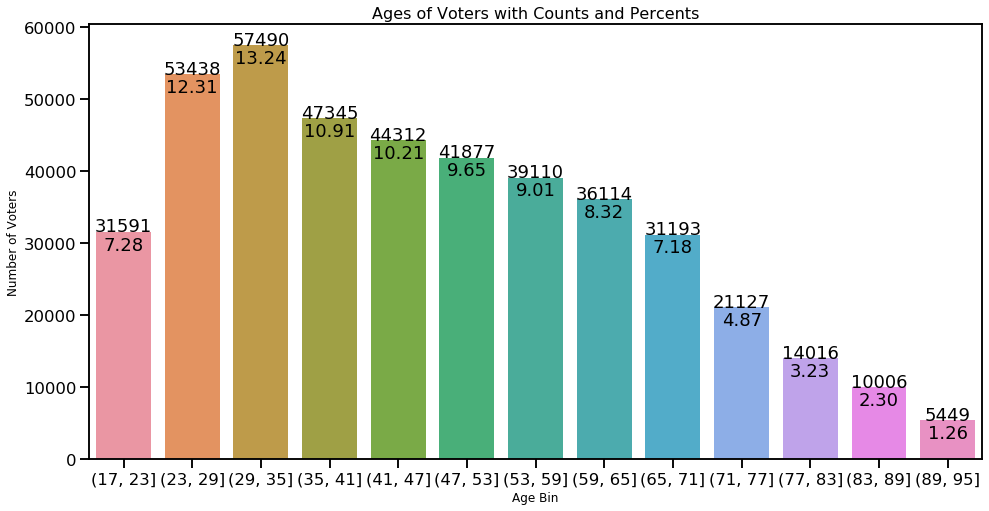

In [35]:
sns.set_context('talk')
fig1, ax1= plt.subplots(figsize=(16,8))
age_plot=sns.countplot('age_cut', data=voter_file)
# determine number of total rows
total=float(len(voter_file))
plt.xlabel('Age Bin', fontsize=12)
plt.ylabel('Number of Voters', fontsize=12)
plt.title('Ages of Voters with Counts and Percents', fontsize=16)
# show count
for p in age_plot.patches:
    height = p.get_height()
    age_plot.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
#show percent
for p in age_plot.patches:
    height = p.get_height()
    age_plot.text(p.get_x()+p.get_width()/2., height -2500,'{:1.2f}'.format((height/total)*100) ,ha="center")

### Party Affiliation

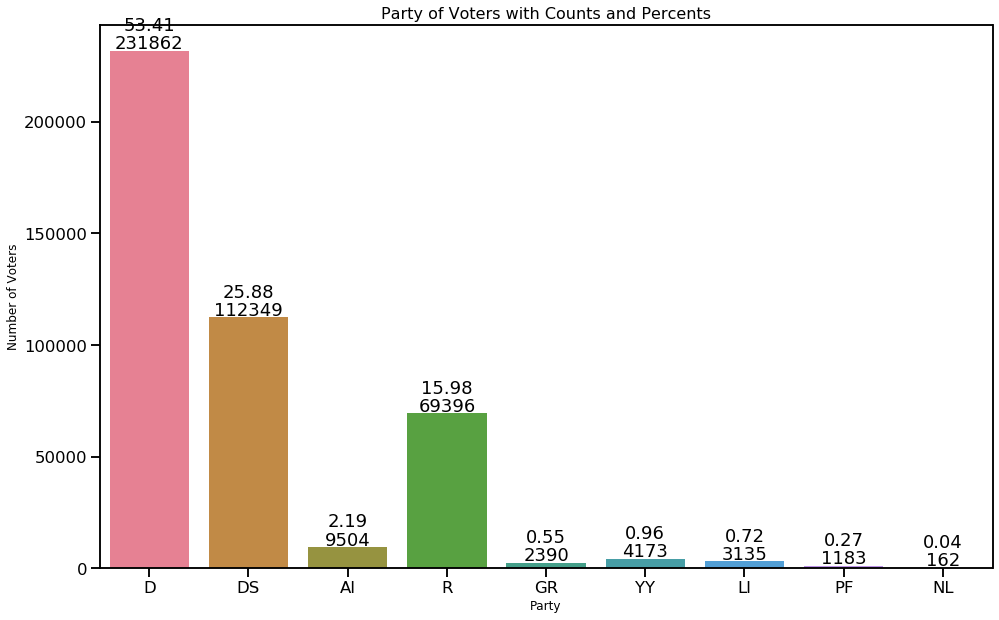

In [36]:

fig3, ax3= plt.subplots(figsize=(16,10))
party_plot=sns.countplot('party', data=voter_file, palette='husl')
plt.xlabel('Party', fontsize=12)
plt.ylabel('Number of Voters', fontsize=12)
plt.title('Party of Voters with Counts and Percents', fontsize=16)
#show count
for p in party_plot.patches:
    height = p.get_height()
    party_plot.text(p.get_x()+p.get_width()/2., height + 900,height ,ha="center")
#show percent
for p in party_plot.patches:
    height = p.get_height()
    party_plot.text(p.get_x()+p.get_width()/2., height + 9000,'{:1.2f}'.format((height/total)*100) ,ha="center")

### Ideology
#### Conservative

In [37]:
#create bins for ideology
ideo_bins=np.arange(0.0, 1.0, 0.1)

In [38]:

ideo_bins

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [39]:
#create column to assign each object an ideology bin
model_prob['ideoC_cut']=pd.cut(model_prob['ideology__conservative'],ideo_bins)

In [40]:
model_prob.head()

,uid,local_schools__good,local_schools__fair,local_schools__poor,vote__candidateA,vote__other,vote__candidateB,ideology__conservative,ideology__liberal,ideology__moderate,...,issueA__no_concerns,issueA__serious_concerns,issueA__some_concerns,issueB__no_concerns,issueB__serious_concerns,issueB__some_concerns,turnout,persuadability__score,job_performance__candidateB,ideoC_cut
0,19101063480,0.177226,0.309224,0.513550,0.286004,0.254312,0.459684,0.571222,0.149370,0.160582,...,0.269443,0.508679,0.221877,0.228690,0.553770,0.217540,0.781051,0.808091,0.302316,"(0.5, 0.6]"
1,19101122779,0.318363,0.497278,0.184359,0.250517,0.097125,0.652358,0.068001,0.324818,0.306552,...,0.288238,0.411582,0.300180,0.305508,0.409580,0.284912,0.321001,0.481455,0.528614,"(0.0, 0.1]"
2,19101930697,0.259784,0.513264,0.226952,0.250072,0.137827,0.612101,0.053519,0.297271,0.279585,...,0.284489,0.389624,0.325887,0.297812,0.400432,0.301756,0.927072,0.417750,0.560018,"(0.0, 0.1]"
3,19102226061,0.326893,0.510956,0.162151,0.357379,0.114221,0.528400,0.102977,0.308384,0.355358,...,0.227971,0.527887,0.244143,0.231301,0.473917,0.294783,0.033656,0.556736,0.422886,"(0.1, 0.2]"
4,19104235280,0.264571,0.413334,0.322095,0.302891,0.164756,0.532354,0.089655,0.309998,0.382134,...,0.246472,0.454156,0.299372,0.269435,0.434299,0.296266,0.186029,0.583980,0.370679,"(0.0, 0.1]"


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


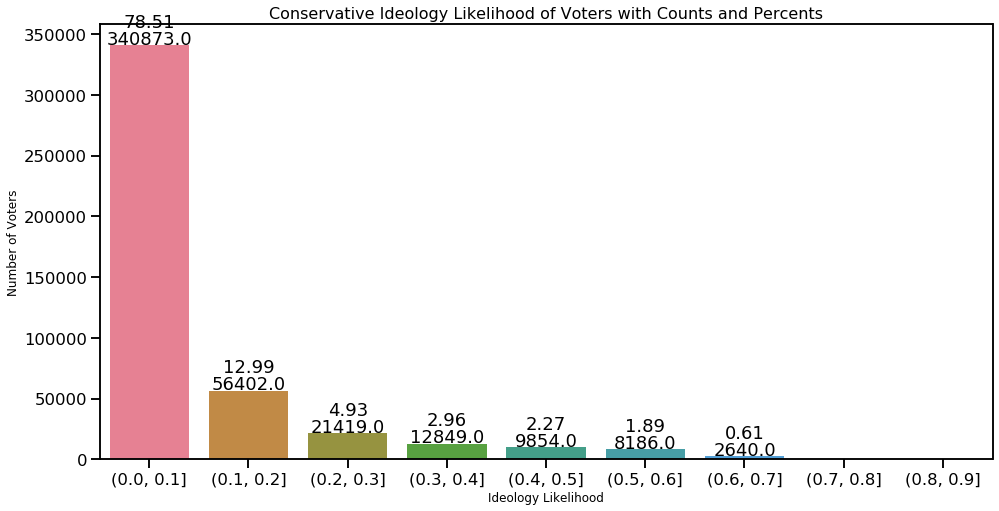

In [41]:
fig5, ax5= plt.subplots(figsize=(16,8))
con_plot=sns.countplot('ideoC_cut', data=model_prob, palette='husl')
plt.xlabel('Ideology Likelihood', fontsize=12)
plt.ylabel('Number of Voters', fontsize=12)
plt.title('Conservative Ideology Likelihood of Voters with Counts and Percents', fontsize=16)
#show count
for p in con_plot.patches:
    height = p.get_height()
    con_plot.text(p.get_x()+p.get_width()/2., height + 1000,height,ha="center")
#show percent
for p in con_plot.patches:
    height = p.get_height()
    con_plot.text(p.get_x()+p.get_width()/2., height + 15000,'{:1.2f}'.format((height/total)*100) ,ha="center")

#### Liberal

In [42]:
#create bin for each ideology
model_prob['ideoL_cut']=pd.cut(model_prob['ideology__liberal'],ideo_bins)
model_prob['ideoM_cut']=pd.cut(model_prob['ideology__moderate'],ideo_bins)
model_prob['ideoP_cut']=pd.cut(model_prob['ideology__progressive'],ideo_bins)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


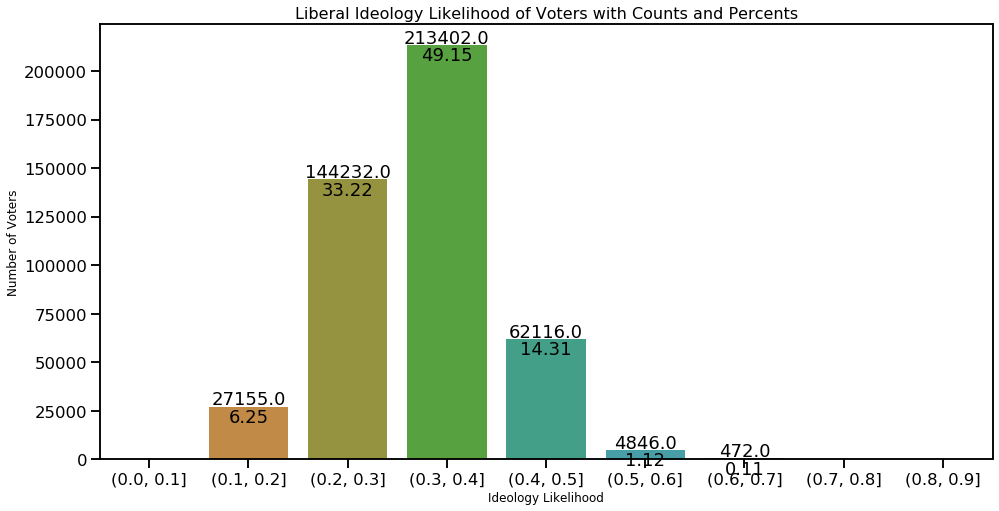

In [43]:
fig7, ax7= plt.subplots(figsize=(16,8))
lib_plot=sns.countplot('ideoL_cut', data=model_prob, palette='husl')
plt.xlabel('Ideology Likelihood', fontsize=12)
plt.ylabel('Number of Voters', fontsize=12)
plt.title('Liberal Ideology Likelihood of Voters with Counts and Percents', fontsize=16)
#Show count
for p in lib_plot.patches:
    height = p.get_height()
    lib_plot.text(p.get_x()+p.get_width()/2., height + 1000,height,ha="center")
#show percent
for p in lib_plot.patches:
    height = p.get_height()
    lib_plot.text(p.get_x()+p.get_width()/2., height - 8000,'{:1.2f}'.format((height/total)*100) ,ha="center")

#### Moderate

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


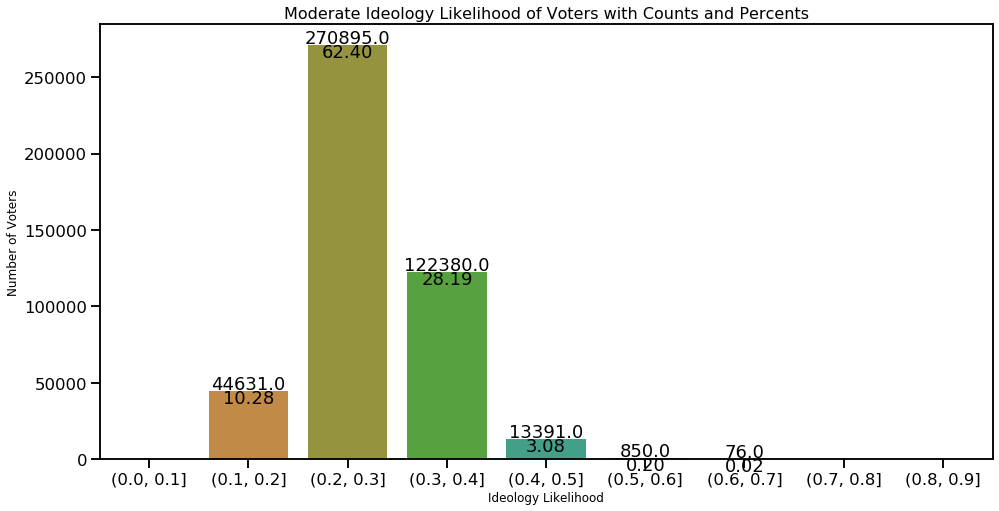

In [44]:
fig9, ax9= plt.subplots(figsize=(16,8))
mod_plot=sns.countplot('ideoM_cut', data=model_prob, palette='husl')
plt.xlabel('Ideology Likelihood', fontsize=12)
plt.ylabel('Number of Voters', fontsize=12)
plt.title('Moderate Ideology Likelihood of Voters with Counts and Percents', fontsize=16)
#show count
for p in mod_plot.patches:
    height = p.get_height()
    mod_plot.text(p.get_x()+p.get_width()/2., height + 1000,height,ha="center")
#show Percent
for p in mod_plot.patches:
    height = p.get_height()
    mod_plot.text(p.get_x()+p.get_width()/2., height -8000,'{:1.2f}'.format((height/total)*100) ,ha="center")

#### Progressive

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


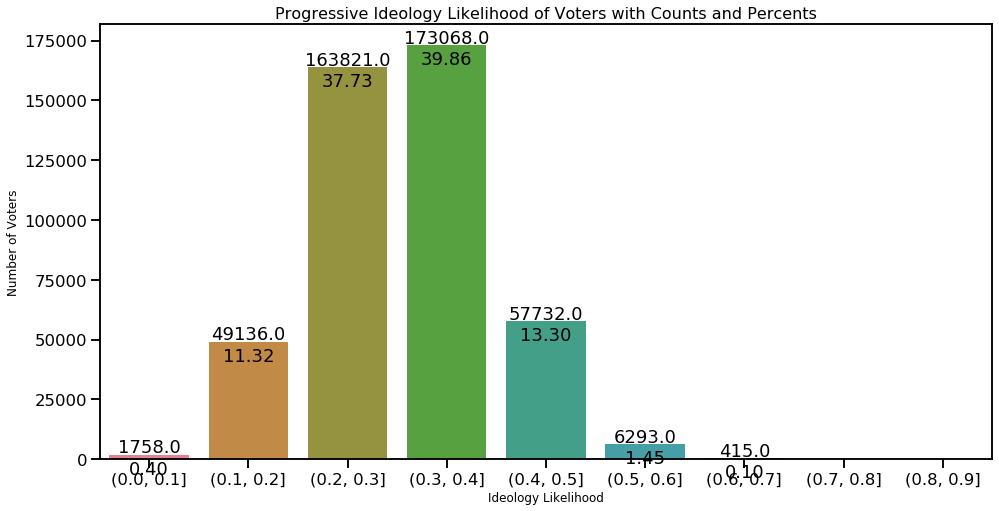

In [45]:
fig11, ax11= plt.subplots(figsize=(16,8))
pro_plot=sns.countplot('ideoP_cut', data=model_prob, palette='husl')
plt.xlabel('Ideology Likelihood', fontsize=12)
plt.ylabel('Number of Voters', fontsize=12)
plt.title('Progressive Ideology Likelihood of Voters with Counts and Percents', fontsize=16)
#show count
for p in pro_plot.patches:
    height = p.get_height()
    pro_plot.text(p.get_x()+p.get_width()/2., height + 1000,height,ha="center")
#show percent
for p in pro_plot.patches:
    height = p.get_height()
    pro_plot.text(p.get_x()+p.get_width()/2., height -8000,'{:1.2f}'.format((height/total)*100) ,ha="center")

In [46]:
# add column that says 'yes' if they are a supporter
supp_voter['charter']='yes'

In [47]:
supp_voter.head()

,uid,age,avghomevalue,avgincome,edu_cg,edu_gd,edu_hsg,edu_nhsg,edu_sc,voted_statewide_primary_2012,...,voted_municipal_primary_2015,voted_municipal_general_2015,voted_statewide_primary_2016,home,ismarried,neighborhood,party,sex,whitecollarp,charter
0,19525324660,51.0,346874,46534,33,9,20,13,31,P,...,N,N,P,H,N,14,DS,M,73,yes
1,19526595695,32.0,0,125528,59,25,11,5,24,N,...,N,N,P,NaN,N,31,R,F,89,yes
2,19525770478,33.0,383332,108264,64,29,9,4,21,N,...,N,N,N,NaN,N,4,R,M,92,yes
3,19258610714,70.0,1455882,260640,67,40,12,1,20,P,...,N,N,A,H,Y,4,R,F,92,yes
4,19244275530,69.0,505849,140996,50,22,21,2,27,N,...,N,N,N,H,Y,8,D,M,91,yes


In [48]:
#add column that says 'no' if they are an opponent
opp_voter['charter']='no'
opp_voter.head()

,uid,age,avghomevalue,avgincome,edu_cg,edu_gd,edu_hsg,edu_nhsg,edu_sc,voted_statewide_primary_2012,...,voted_municipal_primary_2015,voted_municipal_general_2015,voted_statewide_primary_2016,home,ismarried,neighborhood,party,sex,whitecollarp,charter
0,19526650349,33.0,583332,46621,45,11,17,2,34,N,...,N,N,A,NaN,N,16,DS,F,82,no
1,19527138642,26.0,583332,165744,44,7,8,18,27,N,...,N,N,N,NaN,N,31,DS,M,69,no
2,19527003527,26.0,499106,203927,46,21,8,2,44,N,...,N,N,N,H,N,32,D,F,86,no
3,19527917297,67.0,499999,50805,29,7,14,21,26,N,...,N,N,N,NaN,N,31,D,M,59,no
4,19118511593,67.0,1407738,409347,59,32,13,10,18,P,...,N,N,P,NaN,Y,29,D,M,92,no


In [49]:
#stack opponent and supporters dataframes
supp_opp_v=pd.concat([supp_voter, opp_voter])

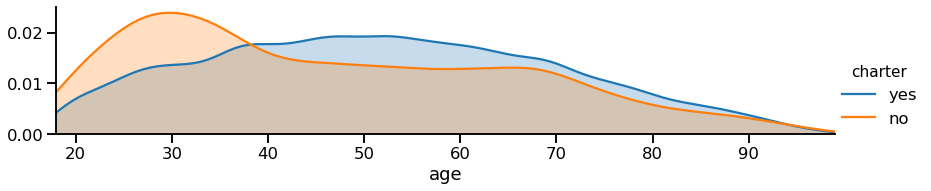

In [178]:
#kde plot shows that proabability of different values 
#create figA object
figA = sns.FacetGrid(supp_opp_v, hue="charter",aspect=4)
#plot all possible kde for age 
figA.map(sns.kdeplot,'age',shade= True)
#set lower and upper age limits
figA.set(xlim=(18,99))
#add a legend
figA.add_legend()

There is a wide spread of ages for charter school supporters. Opponents also have a wide range, but a spike at younger ages.

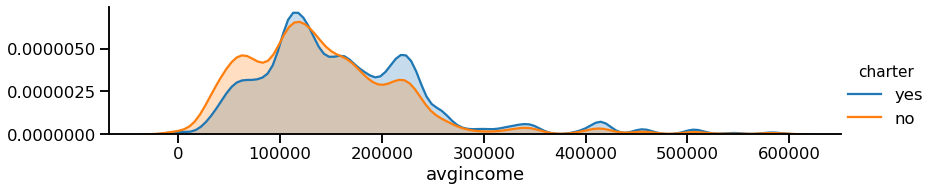

In [79]:
figB = sns.FacetGrid(supp_opp_v, hue="charter",aspect=4)
#plot all possible kde for income
figB.map(sns.kdeplot,'avgincome',shade= True)

#add a legend
figB.add_legend()

Similar average incomes for supporters and opponents.

#### To create a list of inferred supporters, I will look into demographics of the current supporters list.

In [51]:
#do supporters think that local public schools are doing poorly?

supp_lsp=supp_data['local_schools__poor'].value_counts(bins=6)
supp_lsp_df=pd.DataFrame(supp_lsp)
supp_lsp_df['percent']=supp_lsp_df['local_schools__poor']/52567*100
supp_lsp_df=supp_lsp_df.round(2)
supp_lsp_df.columns=['count','percent']
supp_lsp_df


,count,percent
"(0.269, 0.328]",21907,41.67
"(0.328, 0.386]",12285,23.37
"(0.386, 0.445]",10050,19.12
"(0.445, 0.503]",5239,9.97
"(0.503, 0.561]",2948,5.61
"(0.561, 0.619]",138,0.26


In [83]:
# add column that says 'yes' if they are a supporter and 'no' if they are an opponent
supp_data['charter']='yes'
opp_data['charter']='no'

In [84]:
#combine supporter and opponent model probability data
supp_opp_mp=pd.concat([supp_data, opp_data])

In [52]:
# are supporters likely to vote for candidate A who supports charter schools?
supp_A=supp_data['vote__candidateA'].value_counts(bins=5)
supp_A_df=pd.DataFrame(supp_A)
supp_A_df['percent']=supp_A_df['vote__candidateA']/52567*100
supp_A_df=supp_A_df.round(2)
supp_A_df.columns=['count','percent']
supp_A_df



,count,percent
"(0.233, 0.295]",27530,52.37
"(0.295, 0.357]",18862,35.88
"(0.357, 0.42]",3778,7.19
"(0.169, 0.233]",2164,4.12
"(0.42, 0.482]",233,0.44


Thinking that local schools are doing poorly and likelihood of voting for candidate A are not really strong indicators of support for charter schools.

In [78]:
#are supporters conservative?
supp_con=supp_data['ideology__conservative'].value_counts(bins=5)
supp_con_df=pd.DataFrame(supp_con)
supp_con_df['percent']=supp_con_df['ideology__conservative']/52567*100
supp_con_df=supp_con_df.round(2)
supp_con_df.columns=['count','percent']
supp_con_df

,count,percent
"(0.0208, 0.153]",25941,49.35
"(0.153, 0.284]",11428,21.74
"(0.284, 0.414]",6957,13.23
"(0.414, 0.545]",5242,9.97
"(0.545, 0.675]",2999,5.71


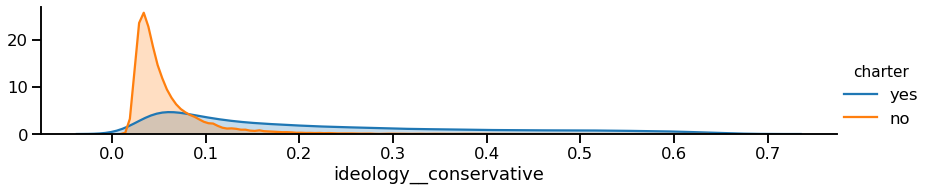

In [87]:
#kde for ideology__conservative
figC = sns.FacetGrid(supp_opp_mp, hue="charter",aspect=4)
#plot all possible kde for ideology 
figC.map(sns.kdeplot,'ideology__conservative',shade= True)
#add a legend
figC.add_legend()

If likelihood of conservative ideology is less than 0.1, then the person is likely to be an opponent. Conservative ideology likelihood higher than 0.1 tend to be supporters.

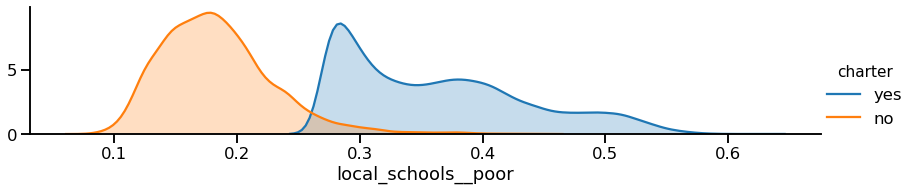

In [88]:
#kde plot for schools are 'doing a poor job'
figD = sns.FacetGrid(supp_opp_mp, hue="charter",aspect=4)
#plot all possible kde for schools__poor
figD.map(sns.kdeplot,'local_schools__poor',shade= True)
#add a legend
figD.add_legend()

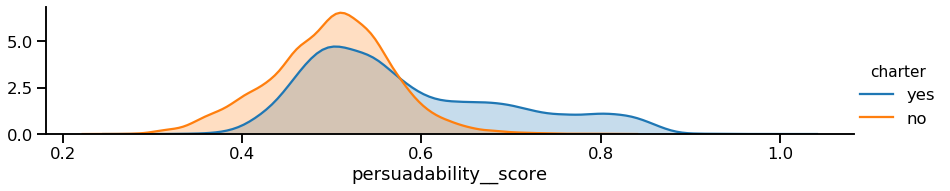

In [89]:
#kde plot for schools are 'persuadability'
figE = sns.FacetGrid(supp_opp_mp, hue="charter",aspect=4)
#plot all possible kde for persuadability
figE.map(sns.kdeplot,'persuadability__score',shade= True)
#add a legend
figE.add_legend()

The strongest indicators of support seem to be conservative ideology and likelihood to believe that schools are doing poorly.

In [90]:
#Merge voter file and modeled data df 
voter_mp=pd.merge(voter_file, model_prob, how='left', on ='uid')

In [92]:
#create inferred supporter list from conservative ideology greater than or equal to 0.1
#and likelihood to think local school are doing poorly greater than or equal to 0.26
inferred_supp=voter_mp[(voter_mp['ideology__conservative']>=0.1)&(voter_mp['local_schools__poor']>=0.26)]

In [93]:
# get number of inferred supporters
inferred_supp.shape

(79398, 48)

In [94]:
#get total number of surveyed people
voter_mp.shape

(434154, 48)

In [96]:
#get percent of inferred supporters
prob_inferred_supp= (79398/434154)*100
prob_inferred_supp

18.287980762586546

Approximately 18% of the the electorate are inferred supporters.

# Part 2 No Contact List

In [53]:
#opp_data is a df created earlier that merged
#the opponents with the model_probabilities data

opp_voter=pd.merge(opp_id, voter_file, how='left', on ='uid')

In [54]:
opp_voter.shape

(11022, 25)

In [55]:
opp_house=pd.merge(opp_id, house_key, how='left', on ='uid')
opp_house.head()
#list of houses on the no contact list

,uid,household_key
0,19526650349,19-192217035
1,19527138642,19-192205218
2,19527003527,19-192470907
3,19527917297,19-191783915
4,19118511593,19-192145192


In [56]:
opp_house.shape

(11022, 2)

##### The dataframe opp_house represents the complete no contact list with households

### Demographic breakdown of No Contact List

In [57]:
opp_voter.head()

,uid,age,avghomevalue,avgincome,edu_cg,edu_gd,edu_hsg,edu_nhsg,edu_sc,voted_statewide_primary_2012,...,voted_municipal_primary_2015,voted_municipal_general_2015,voted_statewide_primary_2016,home,ismarried,neighborhood,party,sex,whitecollarp,age_cut
0,19526650349,33.0,583332.0,46621.0,45.0,11.0,17.0,2.0,34.0,N,...,N,N,A,NaN,N,16.0,DS,F,82.0,"(29, 35]"
1,19527138642,26.0,583332.0,165744.0,44.0,7.0,8.0,18.0,27.0,N,...,N,N,N,NaN,N,31.0,DS,M,69.0,"(23, 29]"
2,19527003527,26.0,499106.0,203927.0,46.0,21.0,8.0,2.0,44.0,N,...,N,N,N,H,N,32.0,D,F,86.0,"(23, 29]"
3,19527917297,67.0,499999.0,50805.0,29.0,7.0,14.0,21.0,26.0,N,...,N,N,N,NaN,N,31.0,D,M,59.0,"(65, 71]"
4,19118511593,67.0,1407738.0,409347.0,59.0,32.0,13.0,10.0,18.0,P,...,N,N,P,NaN,Y,29.0,D,M,92.0,"(65, 71]"


In [58]:
opp_voter.describe()

,uid,age,avghomevalue,avgincome,edu_cg,edu_gd,edu_hsg,edu_nhsg,edu_sc,neighborhood,whitecollarp
count,1.102200e+04,11012.000000,1.101200e+04,11012.000000,11012.000000,11012.000000,11012.000000,11012.000000,11012.000000,11012.000000,11012.000000
mean,1.841787e+10,46.759807,6.142487e+05,142420.131311,48.950327,20.045223,13.604159,9.828914,24.831457,19.881402,77.603705
std,4.152707e+09,19.343465,3.200995e+05,81261.772053,17.065394,11.250693,6.652728,10.022560,8.010353,10.627583,16.825523
min,1.926068e+07,18.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,1.935138e+10,30.000000,4.749990e+05,86267.000000,38.000000,12.000000,9.000000,3.000000,20.000000,14.000000,73.000000
50%,1.952441e+10,43.000000,5.596760e+05,128515.000000,51.000000,19.000000,13.000000,6.000000,26.000000,16.000000,83.000000
75%,1.952660e+10,62.000000,7.946172e+05,182757.000000,61.000000,28.000000,17.000000,13.000000,30.000000,31.000000,89.000000
max,1.952793e+10,99.000000,1.500000e+06,583168.000000,89.000000,53.000000,36.000000,56.000000,51.000000,36.000000,99.000000


In [59]:
#count ages in bins
bins_age=np.arange(18,100, 10)
opp_age=opp_voter['age'].value_counts(bins=bins_age)
opp_age

(28.0, 38.0]      2454
(17.999, 28.0]    2272
(38.0, 48.0]      1591
(58.0, 68.0]      1460
(48.0, 58.0]      1425
(68.0, 78.0]      1070
(78.0, 88.0]       512
(88.0, 98.0]       222
Name: age, dtype: int64

In [60]:
opp_age_df=pd.DataFrame(opp_age)
opp_age_df

,age
"(28.0, 38.0]",2454
"(17.999, 28.0]",2272
"(38.0, 48.0]",1591
"(58.0, 68.0]",1460
"(48.0, 58.0]",1425
"(68.0, 78.0]",1070
"(78.0, 88.0]",512
"(88.0, 98.0]",222


In [61]:
opp_age_df['percent']=(opp_age_df['age']/11022)*100

In [62]:
opp_age_df.round(2)

,age,percent
"(28.0, 38.0]",2454,22.26
"(17.999, 28.0]",2272,20.61
"(38.0, 48.0]",1591,14.43
"(58.0, 68.0]",1460,13.25
"(48.0, 58.0]",1425,12.93
"(68.0, 78.0]",1070,9.71
"(78.0, 88.0]",512,4.65
"(88.0, 98.0]",222,2.01


#### Breakdown of Ages

In [63]:
opp_age_df.columns=['count', 'percent']
opp_age_df=opp_age_df.round(2)
opp_age_df

,count,percent
"(28.0, 38.0]",2454,22.26
"(17.999, 28.0]",2272,20.61
"(38.0, 48.0]",1591,14.43
"(58.0, 68.0]",1460,13.25
"(48.0, 58.0]",1425,12.93
"(68.0, 78.0]",1070,9.71
"(78.0, 88.0]",512,4.65
"(88.0, 98.0]",222,2.01


Approximately 57% are between the ages of 18 and 48

#### Party Affiliation

In [64]:
#count party affiliation
opp_party=opp_voter['party'].value_counts()
opp_party

D     7936
DS    2094
R      573
AI     165
YY      78
GR      67
LI      54
PF      42
NL       3
Name: party, dtype: int64

In [65]:
opp_party_df=pd.DataFrame(opp_party)
opp_party_df

,party
D,7936
DS,2094
R,573
AI,165
YY,78
GR,67
LI,54
PF,42
NL,3


In [66]:
#calc percent party affiliation
opp_party_df['percent']=(opp_party_df['party']/11022)*100
opp_party_df=opp_party_df.round(2)
opp_party_df

,party,percent
D,7936,72.00
DS,2094,19.00
R,573,5.20
AI,165,1.50
YY,78,0.71
GR,67,0.61
LI,54,0.49
PF,42,0.38
NL,3,0.03


In [67]:
opp_party_df.columns=['count','percent']
opp_party_df

,count,percent
D,7936,72.00
DS,2094,19.00
R,573,5.20
AI,165,1.50
YY,78,0.71
GR,67,0.61
LI,54,0.49
PF,42,0.38
NL,3,0.03


72% of opponents are democrats

#### Income

In [68]:
#create income bins
opp_income=opp_voter['avgincome'].value_counts(bins=10)

In [69]:
opp_income

(116633.6, 174950.4]    3436
(58316.8, 116633.6]     3142
(174950.4, 233267.2]    2068
(-583.169, 58316.8]     1389
(233267.2, 291584.0]     519
(291584.0, 349900.8]     199
(408217.6, 466534.4]     150
(466534.4, 524851.2]      42
(524851.2, 583168.0]      34
(349900.8, 408217.6]      33
Name: avgincome, dtype: int64

In [70]:
opp_income_df=pd.DataFrame(opp_income)

In [71]:
#calc income percent
opp_income_df['percent']=(opp_income_df['avgincome']/11022*100)
opp_income_df=opp_income_df.round(2)
opp_income_df

,avgincome,percent
"(116633.6, 174950.4]",3436,31.17
"(58316.8, 116633.6]",3142,28.51
"(174950.4, 233267.2]",2068,18.76
"(-583.169, 58316.8]",1389,12.60
"(233267.2, 291584.0]",519,4.71
"(291584.0, 349900.8]",199,1.81
"(408217.6, 466534.4]",150,1.36
"(466534.4, 524851.2]",42,0.38
"(524851.2, 583168.0]",34,0.31
"(349900.8, 408217.6]",33,0.30


In [72]:
opp_income_df.columns=['count','percent']

In [73]:
opp_income_df

,count,percent
"(116633.6, 174950.4]",3436,31.17
"(58316.8, 116633.6]",3142,28.51
"(174950.4, 233267.2]",2068,18.76
"(-583.169, 58316.8]",1389,12.60
"(233267.2, 291584.0]",519,4.71
"(291584.0, 349900.8]",199,1.81
"(408217.6, 466534.4]",150,1.36
"(466534.4, 524851.2]",42,0.38
"(524851.2, 583168.0]",34,0.31
"(349900.8, 408217.6]",33,0.30


Approximately 60% is in the income range 58,316-174,950

#### Education
No High School Degree and College Graduate are the groups with the highest percentages.

##### No High School Degree

In [74]:
#count regions with percentage of no high school degree
opp_nhsg=opp_voter['edu_nhsg'].value_counts(bins=10)
opp_nhsg

(-0.057, 5.6]    5047
(5.6, 11.2]      2777
(11.2, 16.8]     1299
(16.8, 22.4]      649
(28.0, 33.6]      362
(33.6, 39.2]      333
(22.4, 28.0]      304
(44.8, 50.4]      134
(39.2, 44.8]       95
(50.4, 56.0]       12
Name: edu_nhsg, dtype: int64

In [75]:
opp_nhsg_df=pd.DataFrame(opp_nhsg)
opp_nhsg_df

,edu_nhsg
"(-0.057, 5.6]",5047
"(5.6, 11.2]",2777
"(11.2, 16.8]",1299
"(16.8, 22.4]",649
"(28.0, 33.6]",362
"(33.6, 39.2]",333
"(22.4, 28.0]",304
"(44.8, 50.4]",134
"(39.2, 44.8]",95
"(50.4, 56.0]",12


In [76]:
opp_nhsg_df['percent']=(opp_nhsg_df['edu_nhsg']/11022*100)
opp_nhsg_df=opp_nhsg_df.round(2)
opp_nhsg_df.columns=['count','percent']
opp_nhsg_df

,count,percent
"(-0.057, 5.6]",5047,45.79
"(5.6, 11.2]",2777,25.20
"(11.2, 16.8]",1299,11.79
"(16.8, 22.4]",649,5.89
"(28.0, 33.6]",362,3.28
"(33.6, 39.2]",333,3.02
"(22.4, 28.0]",304,2.76
"(44.8, 50.4]",134,1.22
"(39.2, 44.8]",95,0.86
"(50.4, 56.0]",12,0.11


Approximately 80 percent of opponents come from regions where there is a low percentage of people who do not have a high school degree.

##### College Graduate

In [77]:
#count and percent of college graduate percentage in region 
opp_cg=opp_voter['edu_cg'].value_counts(bins=10)
opp_cg_df=pd.DataFrame(opp_cg)
opp_cg_df['percent']=(opp_cg_df['edu_cg']/11022*100)
opp_cg_df=opp_cg_df.round(2)
opp_cg_df.columns=['count','percent']
opp_cg_df

,count,percent
"(44.5, 53.4]",2486,22.55
"(53.4, 62.3]",2293,20.80
"(62.3, 71.2]",1671,15.16
"(26.7, 35.6]",1280,11.61
"(35.6, 44.5]",1261,11.44
"(71.2, 80.1]",708,6.42
"(17.8, 26.7]",553,5.02
"(8.9, 17.8]",451,4.09
"(-0.09, 8.9]",174,1.58
"(80.1, 89.0]",135,1.22


Approximately 59% of opponents come from a region where at least 44% of people are college graduates.

#### Opponent Summary
Approximately 57% are between the ages of 18 and 48

72% democrats

Approximately 60% is in the income range 58,316-174,950

Approximately 80 percent of opponents come from regions where there is a low percentage of people who do not have a high school degree.

# Part 3 Target Populations

In [106]:
#remove opponent from inferred supporters list 
inferred_supp=pd.merge(inferred_supp, opp_data, on='uid', indicator=True, how='outer')

In [123]:
inferred_supp=inferred_supp[inferred_supp['_merge']=='left_only']
inferred_supp=inferred_supp.drop(['_merge'], axis=1)                            

In [124]:
inferred_supp.head()

,uid,age,avghomevalue,avgincome,edu_cg,edu_gd,edu_hsg,edu_nhsg,edu_sc,voted_statewide_primary_2012,...,issueA__no_concerns_y,issueA__serious_concerns_y,issueA__some_concerns_y,issueB__no_concerns_y,issueB__serious_concerns_y,issueB__some_concerns_y,turnout_y,persuadability__score_y,job_performance__candidateB_y,charter
0,19524714098,74.0,656249.0,160770.0,40.0,12.0,22.0,10.0,26.0,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19527796454,27.0,656249.0,160770.0,40.0,12.0,22.0,10.0,26.0,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19526113717,61.0,656249.0,160770.0,40.0,12.0,22.0,10.0,26.0,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19119365109,53.0,984374.0,120238.0,67.0,23.0,6.0,2.0,22.0,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19525237452,27.0,499999.0,177682.0,57.0,21.0,7.0,15.0,19.0,P,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
inferred_supp=pd.merge(inferred_supp, model_prob, on ='uid', how='left')

In [135]:
inferred_supp.shape

(79167, 92)

Inferred_supp is the list of inferred supporters who have likely conservative ideology greater than 0.1 and likely think schools are doing poorly greater than 0.26. This list has opponents taken out.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


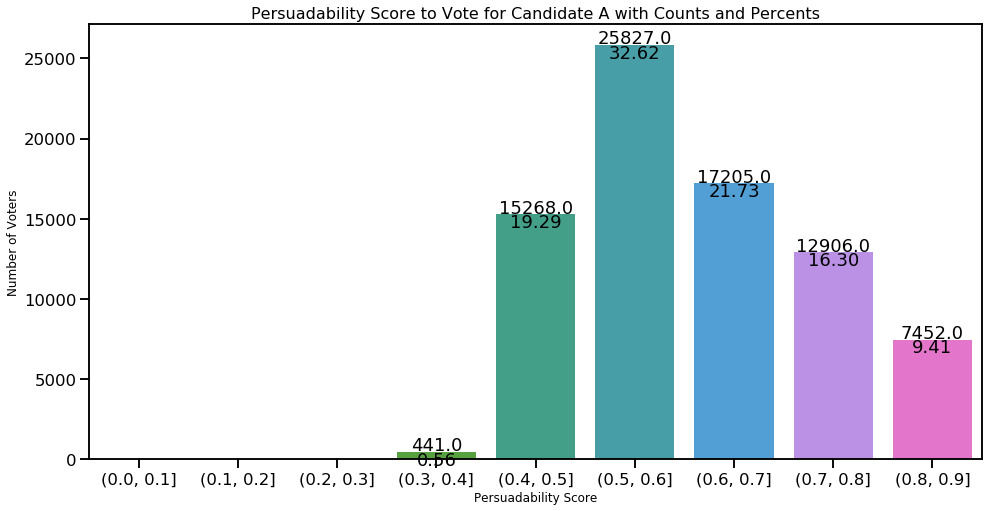

In [138]:
voteA_bins=np.arange(0,1, 0.1)
inferred_supp['vote_A_cut']=pd.cut(inferred_supp['persuadability__score'],voteA_bins)
total2=float(len(inferred_supp))
fig12, ax12= plt.subplots(figsize=(16,8))
suppA_plot=sns.countplot('vote_A_cut', data=inferred_supp, palette='husl')
plt.xlabel('Persuadability Score', fontsize=12)
plt.ylabel('Number of Voters', fontsize=12)
plt.title('Persuadability Score to Vote for Candidate A with Counts and Percents', fontsize=16)
#show count
for p in suppA_plot.patches:
    height = p.get_height()
    suppA_plot.text(p.get_x()+p.get_width()/2., height + 100,height,ha="center")
#show percent
for p in suppA_plot.patches:
    height = p.get_height()
    suppA_plot.text(p.get_x()+p.get_width()/2., height -800,'{:1.2f}'.format((height/total2)*100) ,ha="center")

In [116]:
party_supp=voter_mp[voter_mp.party!='D']

In [117]:
party_supp.shape

(202292, 48)

In [118]:
# take out opponents
party_supp=pd.merge(party_supp, opp_data, on='uid', indicator=True, how='outer')

In [125]:
party_supp=party_supp[party_supp['_merge']=='left_only']
party_supp=party_supp.drop(['_merge'], axis=1)

In [126]:
party_supp.shape

(199216, 68)

In [127]:
#take out inferred_supp
party_supp=pd.merge(party_supp, inferred_supp, on='uid', indicator=True, how='outer')
party_supp=party_supp[party_supp['_merge']=='left_only']

In [139]:
party_supp=pd.merge(party_supp, model_prob, on='uid', how='left')

In [140]:
party_supp.shape

(130258, 160)

party_supp is the larger list of supporters which includes everyone who did not say they were Democrats. It excludes opponents and anyone on the inferred_supp list.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


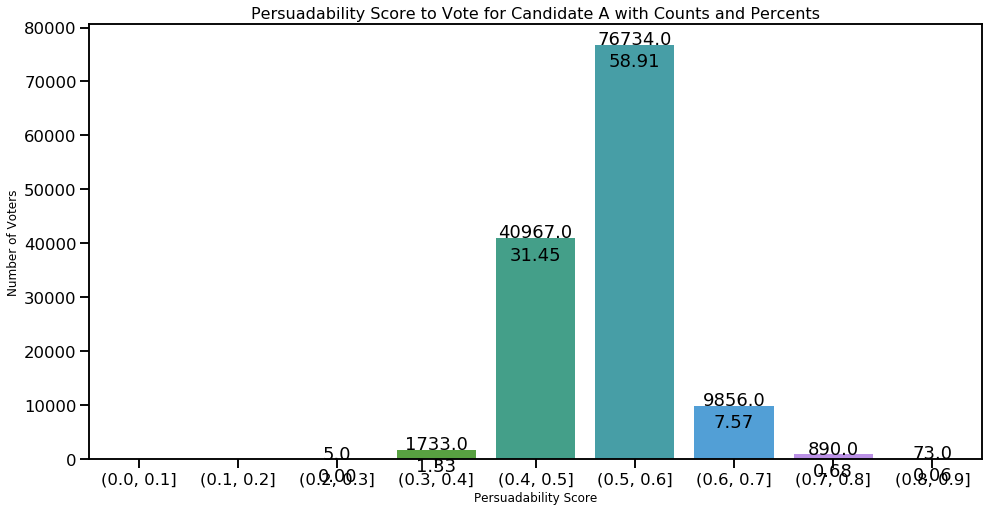

In [143]:
voteA_bins=np.arange(0,1, 0.1)
party_supp['vote_A_cut']=pd.cut(party_supp['persuadability__score'],voteA_bins)
total3=float(len(party_supp))
fig13, ax13= plt.subplots(figsize=(16,8))
partyA_plot=sns.countplot('vote_A_cut', data=party_supp, palette='husl')
plt.xlabel('Persuadability Score', fontsize=12)
plt.ylabel('Number of Voters', fontsize=12)
plt.title('Persuadability Score to Vote for Candidate A with Counts and Percents', fontsize=16)
#show count
for p in partyA_plot.patches:
    height = p.get_height()
    partyA_plot.text(p.get_x()+p.get_width()/2., height + 100,height,ha="center")
#show percent
for p in partyA_plot.patches:
    height = p.get_height()
    partyA_plot.text(p.get_x()+p.get_width()/2., height -4000,'{:1.2f}'.format((height/total3)*100) ,ha="center")